# Think Bayes

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

import numpy as np
import pandas as pd

# import classes from thinkbayes
from thinkbayes import Pmf, Cdf, Suite, Joint

from thinkbayes import thinkplot

## The Space Shuttle problem

Here's a problem from [Bayesian Methods for Hackers](http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter2_MorePyMC/Ch2_MorePyMC_PyMC2.ipynb)

>On January 28, 1986, the twenty-fifth flight of the U.S. space shuttle program ended in disaster when one of the rocket boosters of the Shuttle Challenger exploded shortly after lift-off, killing all seven crew members. The presidential commission on the accident concluded that it was caused by the failure of an O-ring in a field joint on the rocket booster, and that this failure was due to a faulty design that made the O-ring unacceptably sensitive to a number of factors including outside temperature. Of the previous 24 flights, data were available on failures of O-rings on 23, (one was lost at sea), and these data were discussed on the evening preceding the Challenger launch, but unfortunately only the data corresponding to the 7 flights on which there was a damage incident were considered important and these were thought to show no obvious trend. The data are shown below (see [1](https://amstat.tandfonline.com/doi/abs/10.1080/01621459.1989.10478858)):



In [4]:
# !wget https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter2_MorePyMC/data/challenger_data.csv

--2020-06-06 20:26:51--  https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter2_MorePyMC/data/challenger_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.36.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413 [text/plain]
Saving to: ‘challenger_data.csv’

challenger_data.csv 100%[===================>]     413  --.-KB/s    in 0s      

2020-06-06 20:26:51 (8.88 MB/s) - ‘challenger_data.csv’ saved [413/413]



In [5]:
columns = ['Date', 'Temperature', 'Incident']
df = pd.read_csv('challenger_data.csv', parse_dates=[0])
df.drop(labels=[3, 24], inplace=True)
df

,Date,Temperature,Damage Incident
0,1981-04-12,66,0
1,1981-11-12,70,1
2,1982-03-22,69,0
4,1982-01-11,68,0
5,1983-04-04,67,0
6,1983-06-18,72,0
7,1983-08-30,73,0
8,1983-11-28,70,0
9,1984-02-03,57,1
10,1984-04-06,63,1


In [6]:
df['Incident'] = df['Damage Incident'].astype(float)
df

,Date,Temperature,Damage Incident,Incident
0,1981-04-12,66,0,0.0
1,1981-11-12,70,1,1.0
2,1982-03-22,69,0,0.0
4,1982-01-11,68,0,0.0
5,1983-04-04,67,0,0.0
6,1983-06-18,72,0,0.0
7,1983-08-30,73,0,0.0
8,1983-11-28,70,0,0.0
9,1984-02-03,57,1,1.0
10,1984-04-06,63,1,1.0


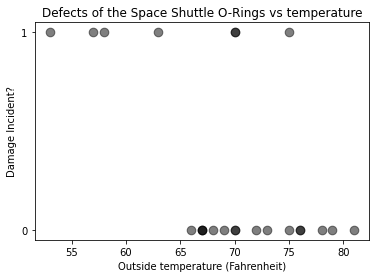

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df.Temperature, df.Incident, s=75, color="k",
            alpha=0.5)
plt.yticks([0, 1])
plt.ylabel("Damage Incident?")
plt.xlabel("Outside temperature (Fahrenheit)")
plt.title("Defects of the Space Shuttle O-Rings vs temperature");

### Grid algorithm

We can solve the problem first using a grid algorithm, with parameters `b0` and `b1`, and

$\mathrm{logit}(p) = b0 + b1 * T$

and each datum being a temperature `T` and a boolean outcome `fail`, which is true is there was damage and false otherwise.

Hint: the `expit` function from `scipy.special` computes the inverse of the `logit` function.

In [8]:
from scipy.special import expit

class Logistic(Suite, Joint):
    
    def Likelihood(self, data, hypo):
        """
        
        data: T, fail
        hypo: b0, b1
        """
        return 1

In [9]:
# Solution goes here

In [10]:
b0 = np.linspace(0, 50, 101);

In [11]:
b1 = np.linspace(-1, 1, 101);

In [12]:
from itertools import product
hypos = product(b0, b1)

In [13]:
suite = Logistic(hypos);

In [14]:
for data in zip(df.Temperature, df.Incident):
    print(data)
    suite.Update(data)

(66, 0.0)
(70, 1.0)
(69, 0.0)
(68, 0.0)
(67, 0.0)
(72, 0.0)
(73, 0.0)
(70, 0.0)
(57, 1.0)
(63, 1.0)
(70, 1.0)
(78, 0.0)
(67, 0.0)
(53, 1.0)
(67, 0.0)
(75, 0.0)
(70, 0.0)
(81, 0.0)
(76, 0.0)
(79, 0.0)
(75, 1.0)
(76, 0.0)
(58, 1.0)


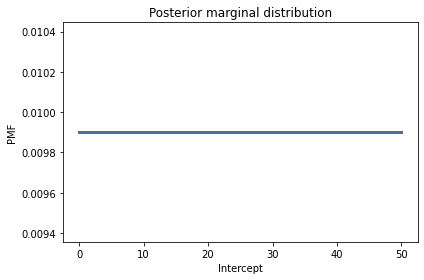

In [15]:
thinkplot.Pdf(suite.Marginal(0))
thinkplot.decorate(xlabel='Intercept',
                   ylabel='PMF',
                   title='Posterior marginal distribution')

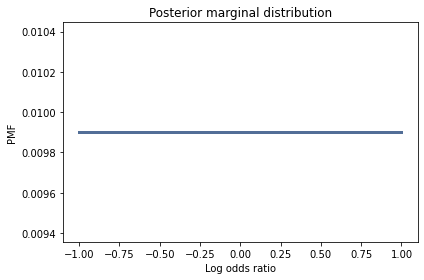

In [16]:
thinkplot.Pdf(suite.Marginal(1))
thinkplot.decorate(xlabel='Log odds ratio',
                   ylabel='PMF',
                   title='Posterior marginal distribution')

According to the posterior distribution, what was the probability of damage when the shuttle launched at 31 degF?

In [17]:
# Solution goes here

In [18]:
# Solution goes here

### MCMC

Implement this model using MCMC.  As a starting place, you can use this example from [the PyMC3 docs](https://docs.pymc.io/notebooks/GLM-logistic.html#The-model).

As a challege, try writing the model more explicitly, rather than using the GLM module.

In [19]:
import pymc3 as pm

In [20]:
# Solution goes here

In [21]:
pm.traceplot(trace);

NameError: name 'trace' is not defined

The posterior distributions for these parameters should be similar to what we got with the grid algorithm.